## 資料

#### 財報

In [1]:
from function.us_stock import download_financial_data
download_financial_data(['AAPL','TSLA','META','2330.TW'])

processing: AAPL
processing: TSLA
processing: META
processing: 2330.TW


[]

#### 下載個股成交資料

In [1]:
from function.us_stock import download_stock_data
download_stock_data(['AAPL','TSLA','META','2330.TW'])

抓取資料: AAPL
抓取資料: TSLA
抓取資料: META
抓取資料: 2330.TW


[]

#### 盤中資料

In [13]:
from function.us_stock import get_intraDay_data_today, get_intraDay_data_7day, get_intraDay_data_6month
from datetime import datetime, timedelta
import os

stock_symbol='2330.TW' # 2330.TW OR AAPL
csv_name= '盤中資料'

stock_data = get_intraDay_data_today(stock_symbol)
# stock_data = get_intraDay_data_7day(stock_symbol)
# stock_data = get_intraDay_data_6month(stock_symbol)

current_date = datetime.now().strftime('%Y%m%d')

# Create directory structure
output_directory = os.path.join('DATA', current_date, stock_symbol)
os.makedirs(output_directory, exist_ok=True)

# Save data to CSV file
file_path = os.path.join(output_directory, f'{csv_name}.csv')
stock_data.to_csv(file_path)


[*********************100%%**********************]  1 of 1 completed


#### TOP100美股

In [5]:
import pandas as pd

url = 'https://finance.yahoo.com/screener/predefined/most_actives?count=100&offset=1'
data = pd.read_html(url)[0]
print(data)
# 欄位『Symbol』就是股票代碼
stk_list = data.Symbol
# stk_list

   Symbol                                  Name  Price (Intraday)   Change  \
0    TSLA                           Tesla, Inc.          234.2100  -6.9900   
1    NVDA                    NVIDIA Corporation          487.1600 -12.2800   
2    PLTR            Palantir Technologies Inc.           19.6900  -0.1100   
3     AMD          Advanced Micro Devices, Inc.          122.5100   3.3500   
4    MARA       Marathon Digital Holdings, Inc.           10.9200   0.6100   
5    VALE                             Vale S.A.           15.2100  -0.1900   
6     AAL          American Airlines Group Inc.           12.3100   0.1800   
7    AMZN                      Amazon.com, Inc.          146.7100   2.8100   
8       F                    Ford Motor Company           10.2600   0.0700   
9      LU                     Lufax Holding Ltd            0.9068   0.0011   
10   SOFI               SoFi Technologies, Inc.            6.9000   0.1800   
11   AAPL                            Apple Inc.          191.310

#### 翻譯資料

In [17]:
from function.us_stock import translate_and_save
translate_and_save('./Data/財報資料/AAPL/現金流量表.csv')

{'Beginning Cash Position': '期初現金餘額', 'Capital Expenditure': '資本支出', 'Cash Dividends Paid': '支付現金股利', 'Cash Flow From Continuing Financing Activities': '來自持續融資活動的現金流量', 'Cash Flow From Continuing Investing Activities': '來自持續投資活動的現金流量', 'Cash Flow From Continuing Operating Activities': '來自持續營運活動的現金流量', 'Change In Account Payable': '應付賬款的變動', 'Change In Inventory': '存貨的變動', 'Change In Other Current Assets': '其他流動資產的變動', 'Change In Other Current Liabilities': '其他流動負債的變動', 'Change In Other Working Capital': '其他營運資本的變動', 'Change In Payable': '應付款項的變動', 'Change In Payables And Accrued Expense': '應付款項及應計費用的變動', 'Change In Receivables': '應收款項的變動', 'Change In Working Capital': '營運資本的變動', 'Changes In Account Receivables': '應收賬款的變動', 'Changes In Cash': '現金變動', 'Common Stock Dividend Paid': '支付普通股股息', 'Common Stock Issuance': '發行普通股', 'Common Stock Payments': '支付普通股款', 'Deferred Income Tax': '递延所得税', 'Deferred Tax': '递延税款', 'Depreciation Amortization Depletion': '折舊、攤銷和減值', 'Depreciation And Amort

## 繪圖

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

# 使用中文字體
# plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

stock_id = '2330.TW'
ohlcv = yf.Ticker(stock_id).history(period='max')

x = ohlcv.tail(120).index.astype(str)
y = ohlcv.tail(120)

def ma(n):
    return ohlcv.Close.rolling(n).mean().tail(120)

fig,ax = plt.subplots(figsize=(23,8),dpi=80,facecolor='#414343')

ax.set_facecolor('#414343')
ax.bar(x,y.Close-y.Open*0.9995,0.6,y.Open,color=['#e27980' if x>0 else '#73d9b6' for x in y.Close-y.Open])
ax.vlines(x,y.Low,y.High,color=['#e27980' if x>0 else '#73d9b6' for x in y.Close-y.Open])
for n,color in zip([5,20,60,120],['#6b90e4','#fae239','#93d557','#aa57d5']):
    ax.plot(x,ma(n),color=color,label=f"ma{n}")

ax2 = ax.twinx()
ax2.bar(x,y.Volume,color='#39a1fa',alpha=.2)

ax.set_title(f"{stock_id} 個股K線圖",fontsize=25,color='w',loc='left',y=1.1)
ax.set_xlabel('Date',fontsize=13,color='w')
ax.set_ylabel('Price',fontsize=13,color='w')
ax2.set_ylabel('Volume',fontsize=13,color='w')
ax.tick_params('x',labelcolor='w')
ax.tick_params('y',labelcolor='w')
ax2.tick_params('y',labelcolor='w')

ax.text(x[1],y.Close.mean(),
        f"{y.index[-1].strftime('%Y-%m-%d')}\n\n開:{y.Open[-1]}\n收:{y.Close[-1]}\n高:{y.High[-1]}\n低:{y.Low[-1]}\n量:{y.Volume[-1]}\n幅:{round(((y.Close/y.Close.shift())[-1]-1)*100,2)} %",

color='w',fontsize=18,bbox=dict(boxstyle='round',ec='#fa397708',fc='#fa397708'))

ax.legend(fontsize=12,loc='upper left')
ax.set_xticks(np.arange(0,len(x),len(x)/10))
ax.grid('-',alpha=.5)

plt.show()

                  Open        High         Low       Close    Volume
Date                                                                
2023-07-17  584.739414  587.722778  583.744959  587.722778  13807834
2023-07-18  583.744927  584.739381  576.783744  577.778198  20932006
2023-07-19  580.761562  583.744927  575.789289  577.778198  22499123
2023-07-20  576.783761  580.761580  574.794852  575.789307  15108109
2023-07-21  556.894653  559.878018  553.911289  556.894653  46711021
...                ...         ...         ...         ...       ...
2023-11-17  579.000000  583.000000  579.000000  580.000000  22031704
2023-11-20  576.000000  579.000000  575.000000  577.000000  22010114
2023-11-21  582.000000  585.000000  581.000000  585.000000  35921706
2023-11-22  576.000000  579.000000  574.000000  577.000000  21969125
2023-11-23  574.000000  578.000000  574.000000  578.000000  14771713

[90 rows x 5 columns]


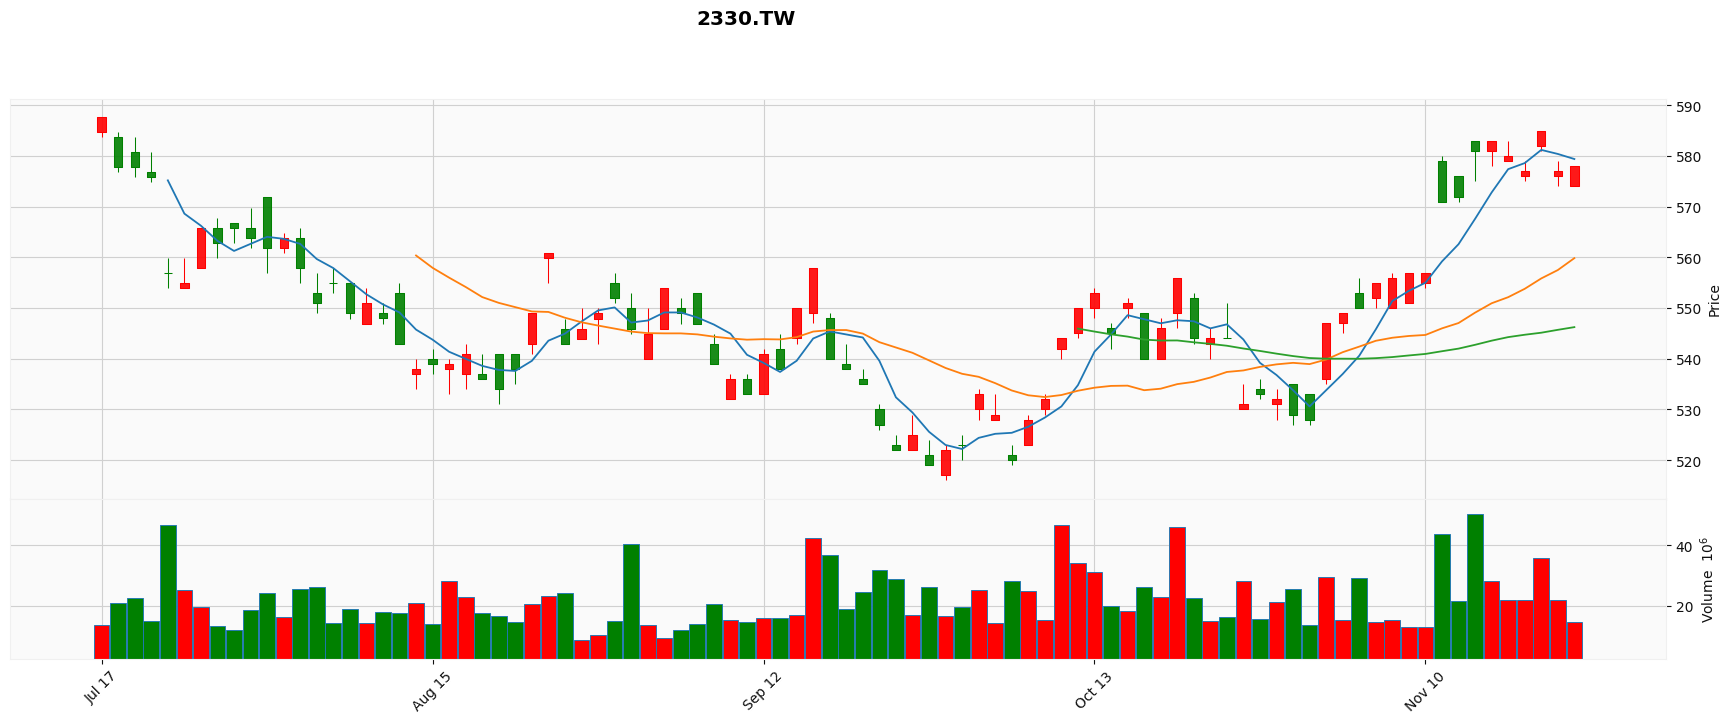

In [1]:
from function.us_stock import plot_stock_chart
plot_stock_chart('2330.TW',90)

#### 技術指標計算

<Axes: xlabel='Date'>

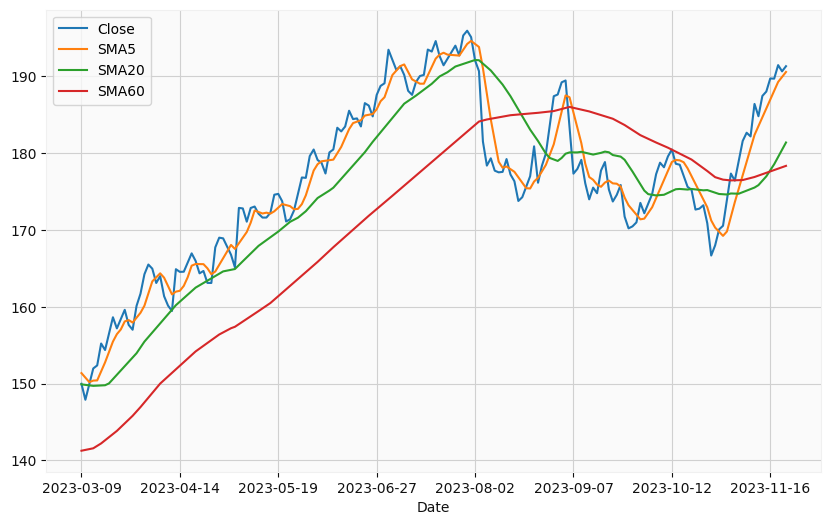

In [2]:
import numpy as np
import pandas as pd
import talib

df = pd.read_csv(f'./Data/20231123/日成交資料_AAPL.csv', index_col='Date')
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
df['SMA5'] = talib.SMA(df['Close'],5)
df['SMA20'] = talib.SMA(df['Close'],20)
df['SMA60'] = talib.SMA(df['Close'],60)
df = df.iloc[-180:]

df[['Close','SMA5','SMA20','SMA60']].plot(grid=True, figsize=(10, 6))
